# Loading Dataset

In [2]:
import pandas as pd

# Importing data
bloomberg = pd.read_csv("../data/BloombergSampleData.csv")

# Print head
bloomberg.head()

# # Module to save df as png
# import dataframe_image as dfi

# # Exporting whole dataset head
# dfi.export(bloomberg.head(), 'whole_dataframe.png')

,EID,CaptureTime,SUID,Event,Version,WireName,Headline,TimeOfArrival,LanguageString,Web_URL,...,AssignedPeopleId,AssignedPeopleScore,DerivedTickersId,DerivedTickersScore,Derived_ID_BB_GLOBAL_COMPANY,Derived_ID_BB_GLOBAL,DerivedTopicsId,DerivedTopicsScore,DerivedPeopleId,DerivedPeopleScore
0,80001,2021-04-11T21:58:29.916+00:00,QR583QHHWW74,UPDATE_ATTRIBUTE,ORIGINAL,BFW,*EFFECTIVE FED FUNDS RATE 0.07% APRIL 5 VS 0.0...,2021-04-06T12:59:50.523+00:00,ENGLISH,NaN,...,3224929,70,%USD,95,NaN,NaN,METALKEY;BIZNEWS;UST;MSCIWORLD;NORTHAM;GLOBALM...,99;100;70;100;100;100;100;70;100;100;100;100;1...,3224929,70
1,80001,2021-06-05T17:19:26.284+00:00,QU7WO1DWRGG5,UPDATE_ATTRIBUTE,ORIGINAL,BN,Manchester United Will Allow Soccer Fans to Bu...,2021-06-05T10:13:27.856+00:00,ENGLISH,NaN,...,19241440;20280148;21061455;4647565,70;70;70;70,MANU,96,BBG0035WV4M0,BBG0035WV4N9,CORPFIN;UKTOP;SPWWTOP;BIZNEWS;MSCIWORLD;EQTY;O...,100;100;100;100;100;100;100;100;100;95;100;100...,19241440;20280148;21061455;4647565,70;70;70;70
2,80178,2020-10-31T08:53:51.680+00:00,QJ261RMB2SJL,ADD_STORY,ORIGINAL,NS6,"NDTV: ""Which Post Star Campaigner Has?"": Kamal...",2020-10-31T08:53:51.488+00:00,ENGLISH,https://www.ndtv.com/india-news/madhya-pradesh...,...,NaN,NaN,NaN,NaN,NaN,NaN,BIZNEWS;MSCIWORLD;INDGOV;ASIAX;ELECT;MISC;GOV;...,95;50;50;75;89;100;95;50;50;89;75;50;89;99;50;...,NaN,NaN
3,80178,2021-02-26T09:34:07.704+00:00,QP4O1GMB2SJM,UPDATE_ATTRIBUTE,ORIGINAL,NS5,El Mundo: Cataluña permitirá la apertura de lo...,2021-02-26T08:39:16.395+00:00,SPANISH,https://www.elmundo.es/cataluna/2021/02/26/603...,...,NaN,NaN,NaN,NaN,NaN,NaN,VIRALILL;GENHEA;MISC;INFECT;ILLNESS;SRCRANK2;C...,74;74;100;74;74;100;50,NaN,NaN
4,80001,2020-12-22T22:32:25.957+00:00,QLLQWQT1UM1J,UPDATE_ATTRIBUTE,ORIGINAL,BN,*BIDEN SAYS HE WILL REJOIN THE PARIS CLIMATE A...,2020-12-19T19:46:02.901+00:00,ENGLISH,NaN,...,13387985;16973612;20604234,70;70;70,NaN,NaN,NaN,NaN,BIZNEWS;MSCIWORLD;NORTHAM;GLOBALMACR;USGOV;ACE...,100;100;100;100;100;70;100;100;70;91;100;100;1...,13387985;16973612;20604234,70;70;70


# Data Cleaning

In [3]:
# Keep only English papers with relevant text information
papers = bloomberg[bloomberg['LanguageString'] == 'ENGLISH']
papers = papers[["EID", "Headline", "TimeOfArrival", "Web_URL", "DerivedTopicsId"]]

# Load expression library
import re

## Removing special characters and lower case
def cleanTxt(txt):
    txt = re.sub(r'[,\.!?*]', '', str(txt))
    txt = re.sub(r'&amp;', '', str(txt)) # Removed ampersands
    txt = txt.lower()
    return txt

papers['processed_headlines'] = papers['Headline'].apply(cleanTxt)

# Drop NA
papers = papers.dropna(axis = 0, subset = ["Headline"])

# Dataset head for checking
papers["processed_headlines"][0:30]

# # Saving df as a png
# dfi.export(sample.head(), '../images/cleaned_dataframe.png')


0     effective fed funds rate 007% april 5 vs 007% ...
2     manchester united will allow soccer fans to bu...
3     ndtv: "which post star campaigner has": kamal ...
5     biden says he will rejoin the paris climate ac...
8     tesla delivers ‘eye popping’ 241300 cars in re...
14    calstrs backs american water on 13 of 13 propo...
15                 megacable 1q rev mxn595b est mxn595b
16              trafigura has acquired over 3% of saras
17    mexico reports 16374 new covid-19 cases 1434 m...
18    more than 50m people in japan fully vaccinated...
20        us latest treasury auction statistics (table)
21    norilsk nickel to close smelter in town of nic...
23    germany steps up virus checks at french border...
24    us judge approves daimler’s $15b diesel settle...
29    us treasury to auction $30 billion in eight-we...
35               perth mint gold sales 62637 oz in sept
39    brazil's mdb party taps simone tebet as senate...
47    btps an unlikely corner of bond market tha

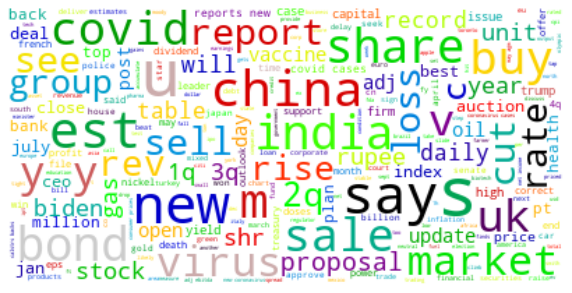

In [4]:
# Word Cloud images
from wordcloud import WordCloud

# Matplot Lib
import matplotlib.pyplot as plt

# Creating all words
allWords = " ".join(list(papers['processed_headlines'].values))

# Generate cloud|
wordClouds = WordCloud(random_state = 21,
                                 background_color = "white",
                                 colormap='nipy_spectral',
                                 max_font_size = 50,
                                 max_words = 500).generate(allWords)
plt.figure(figsize=[10,10])
plt.imshow(wordClouds, interpolation = "bilinear")
plt.axis("off")
plt.savefig('../images/bloomberg_wordcloud.png')
plt.show()

In [5]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

# Most single letters appearing are stock symbol calls - Citigroup $C, Alleghany $Y, etc. 
# U.S. gets put to u and s separated
stop_words.extend(['u','s', 'm', 'from','y','re', 'c', 'v'])

# Make sentences into collection of words using gensim
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc = True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

# remove stopwords
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

# Process headlines
data = papers.processed_headlines.values.tolist()
data_words = list(sent_to_words(data))

data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

['effective', 'fed', 'funds', 'rate', 'april', 'vs', 'april']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\D7RW4\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Phrase Modeling

In [8]:
# Bi- and Tri-grams are words that frequently occur together or in groups of threes

# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold gives fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# Define functions for stopwords, bigrams, trigrams and lemmatization
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [13]:
import spacy
# if necessary, install using !pip3 install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])


print(data_lemmatized[:1])

ERROR: Could not install packages due to an OSError: HTTPSConnectionPool(host='github.com', port=443): Max retries exceeded with url: /explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate in certificate chain (_ssl.c:1129)')))



OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

# Data Transformation to Corpus

In [67]:
import gensim.corpora as corpora

# Create dictionary
id2word = corpora.Dictionary(data_words)

# Create corpus
texts = data_words

# Term document frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]


# Model Training

In [60]:
from pprint import pprint

# number of topics - can be set to different amounts; need to test around and see optimal topic #
num_topics = 10

# Build lda model
lda_model = gensim.models.LdaMulticore(corpus = corpus,
                                       id2word = id2word,
                                       num_topics = num_topics)

# Print keywords in 10 topics
pprint(lda_model.print_topics()) 
doc_lda = lda_model[corpus]

[(0,
  '0.007*"eu" + 0.007*"gas" + 0.007*"sees" + 0.005*"rev" + 0.005*"billion" + '
  '0.005*"credit" + 0.005*"cases" + 0.005*"warns" + 0.005*"vs" + '
  '0.005*"proposals"'),
 (1,
  '0.009*"new" + 0.006*"deaths" + 0.006*"us" + 0.006*"vs" + 0.006*"rate" + '
  '0.006*"month" + 0.006*"reports" + 0.006*"trump" + 0.004*"china" + '
  '0.004*"ceo"'),
 (2,
  '0.012*"loss" + 0.010*"share" + 0.008*"says" + 0.008*"gas" + 0.008*"est" + '
  '0.006*"biden" + 0.006*"cn" + 0.006*"sees" + 0.006*"market" + '
  '0.004*"issues"'),
 (3,
  '0.010*"new" + 0.009*"year" + 0.007*"china" + 0.006*"million" + 0.006*"says" '
  '+ 0.004*"weekend" + 0.004*"right" + 0.004*"vaccine" + 0.004*"us" + '
  '0.004*"banks"'),
 (4,
  '0.009*"est" + 0.007*"market" + 0.007*"covid" + 0.005*"yield" + '
  '0.005*"health" + 0.005*"adj" + 0.005*"jan" + 0.005*"says" + 0.004*"recap" + '
  '0.004*"star"'),
 (5,
  '0.008*"shr" + 0.008*"est" + 0.006*"reports" + 0.006*"deal" + 0.006*"us" + '
  '0.006*"buy" + 0.006*"group" + 0.006*"adj" + 0

In [ ]:
import pyLDAvis.gensim
import pickle
import pyLDAvis
import os

# Visualize topics
pyLDAvis.enable_notebook()

LDAvis_path_file = os.path.join('../images/ldavis_' + str(num_topics))

# Need to make true statement to begin visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim